In [1]:
# Load ipython methods for module reloading at runtime.  Useful if a module
# gets updated between running of this notebook.
%load_ext autoreload
%autoreload 2

    
# Load modules/classes    
import numpy as np
import matplotlib.pyplot as plt
from loadOpenFOAM import loadOpenFOAM





In [2]:
# User input.
meshDir = '/scratch/mchurchf/simpleHill/meshGeneration-500km-18km-L2500-h150'
caseDir = '/scratch/mchurchf/simpleHill/run-6mps-0.0044Kpm-inletOutlet-RDtop'
moveDynamicMeshTime = 200
solutionTime = 144000


# These correspond to how this version of OpenFOAM is compiled.
intType = 'int64'         # 64-bit integers
floatType = 'double'      # double-precision reals


# The mesh points have to be rounded before sorting because they differ out at the
# 10th-12th digit when they should not.  Rounding to 8 decimals eliminates this problem.
roundingDecimals = 8




In [3]:
# Read the undeformed mesh (created with blockMesh) data.
OFdataBase = loadOpenFOAM()
OFdataBase.readMesh(meshDir + '/constant/polyMesh')




Reading the mesh from /scratch/mchurchf/simpleHill/meshGeneration-500km-18km-L2500-h150/constant/polyMesh
    -Reading the points file...
    -Reading the faces file...
    -Reading the owners file...
    -Reading the neighbours file...
Computing cell face centers and areas: 100.0% complete...
Computing cell centers and volumes: 100.0% complete...


Summary:
    -number of cells: 900000
    -number of faces: 3602860
    -number of owners: 3602860
    -number of neighbours: 1797140
    -number of points: 1805722


In [4]:
# Read the deformed hill mesh (deformed with moveDynamicMesh) data.
OFdataHill = loadOpenFOAM()
OFdataHill.readMesh(caseDir + '/constant/polyMesh')




Reading the mesh from /scratch/mchurchf/simpleHill/run-6mps-0.0044Kpm-inletOutlet-RDtop/constant/polyMesh
    -Reading the points file...
    -Reading the faces file...
    -Reading the owners file...
    -Reading the neighbours file...
Computing cell face centers and areas: 100.0% complete...
Computing cell centers and volumes: 100.0% complete...


Summary:
    -number of cells: 900000
    -number of faces: 3602860
    -number of owners: 3602860
    -number of neighbours: 1797140
    -number of points: 1805722


In [5]:
# Although OpenFOAM is purely unstructured, the base mesh topology is structured.  Find its structure,
# which consists of figuring out number of points in x, y, and z, and the sorting and reshaping required
# to get data into structured format.  The hill mesh/solution has the same ordering as the base mesh, so
# we can apply the sort/reshaping to those data to get the hill data in structured format.
nx,ny,nz,iSort = OFdataBase.findMeshStructure(OFdataBase.cellCenters,precision=roundingDecimals)

print('nx =',nx)
print('ny =',ny)
print('nz =',nz)




nx = 2500
ny = 1
nz = 360


In [14]:
# Read the velocity solution field.
U,nComp = OFdataHill.readField(caseDir + '/' + str(solutionTime),'U')
T,nComp = OFdataHill.readField(caseDir + '/' + str(solutionTime),'T')




    -Reading the U file...
    -Data type is vector 

    -Reading the T file...
    -Data type is scalar 



In [15]:
# Make the data structured and extract x- and z-components.
cellCenters = OFdataHill.cellCenters
cellCenters = cellCenters[iSort]
cellCenters = np.reshape(cellCenters,(nx,nz,3))

x = cellCenters[:,:,0]
z = cellCenters[:,:,2]

U = U[iSort]
U = np.reshape(U,(nx,nz,3))
T = T[iSort]
T = np.reshape(T,(nx,nz))


u = U[:,:,0]
w = U[:,:,2]
Tprime = T - 300 - z*0.0044

print(np.shape(x),np.shape(z),np.shape(u),np.shape(w),np.shape(T))




(2500, 360) (2500, 360) (2500, 360) (2500, 360) (2500, 360)


/tmp/ipykernel_62768/709826328.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(x,z,w,cmap='RdBu_r',vmin=-0.3,vmax=0.3)
/tmp/ipykernel_62768/709826328.py:7: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(x,z,Tprime,cmap='RdBu_r')


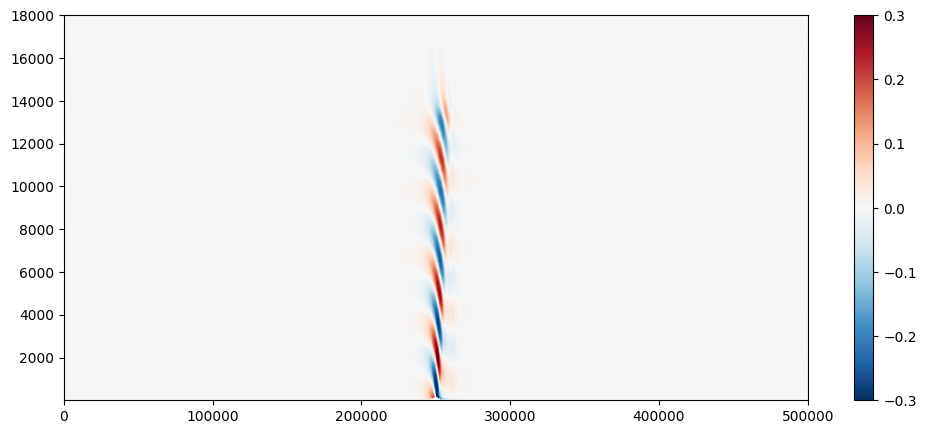

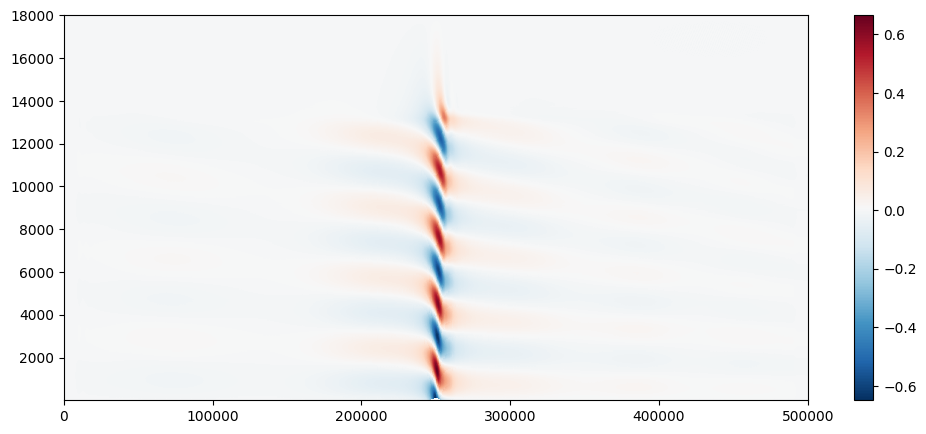

In [16]:
plt.figure(0,figsize=(12,5))
plt.pcolor(x,z,w,cmap='RdBu_r',vmin=-0.3,vmax=0.3)
plt.colorbar()


plt.figure(1,figsize=(12,5))
plt.pcolor(x,z,Tprime,cmap='RdBu_r')
plt.colorbar()

